In [2]:
pip install imblearn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.shape

(768, 9)

<AxesSubplot:>

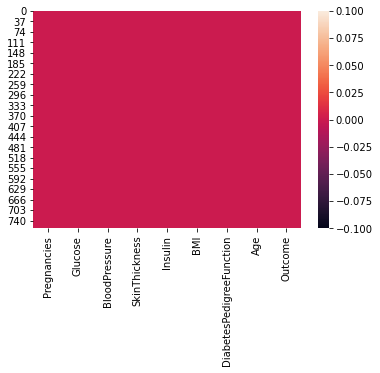

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =\
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

<AxesSubplot:>

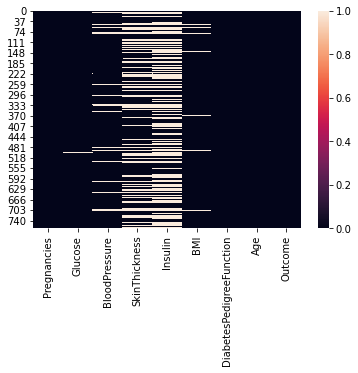

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.fillna(df.mean(), inplace = True)

<AxesSubplot:>

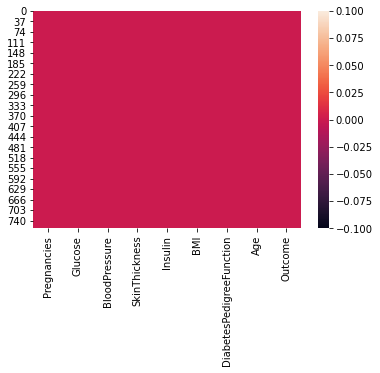

In [15]:
sns.heatmap(df.isnull())

In [16]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [20]:
oversample = SMOTE()
counter = Counter(y)
X, y = oversample.fit_resample(X,y)

In [21]:
counter = Counter(y)
print(counter)

Counter({1: 500, 0: 500})


In [22]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

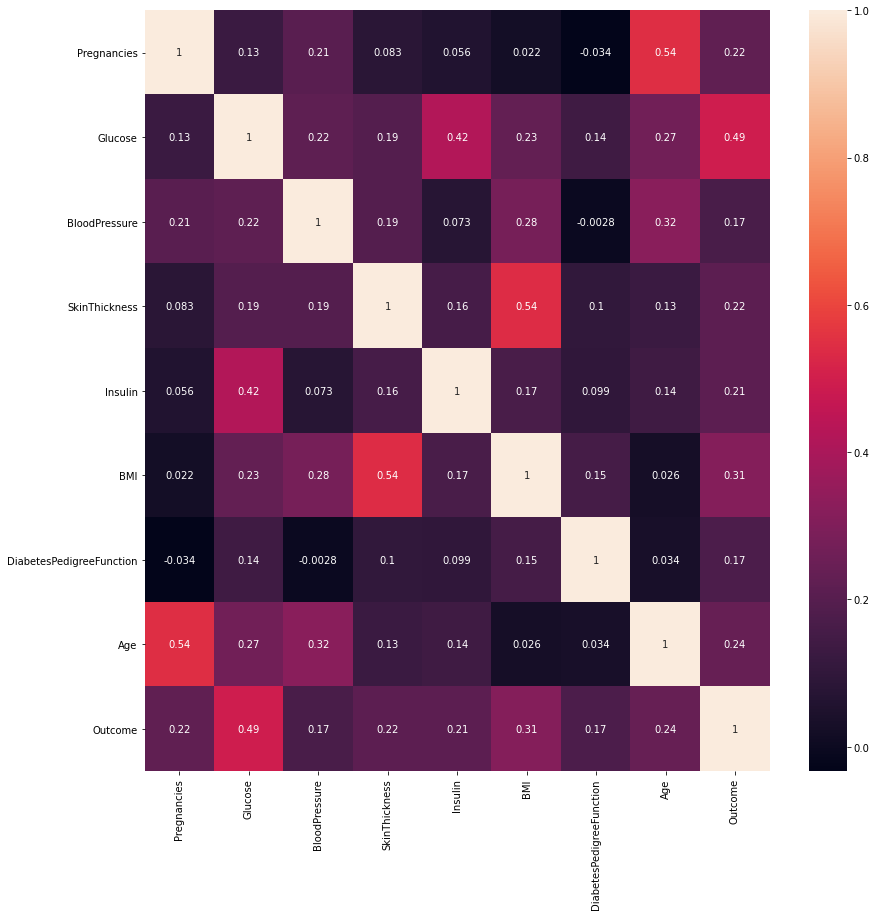

In [23]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot = True)

In [19]:
X = df[['Glucose','BMI','Age']]
y = df['Outcome']

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =0.3,random_state = 100)

In [27]:
knn = KNeighborsClassifier(n_neighbors= 3)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
predict = knn.predict(X_test)

In [30]:
predict

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1], d

In [31]:
knn.predict([[234, 40, 45]])

array([1], dtype=int64)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       153
           1       0.74      0.80      0.76       147

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(knn, X, y, cv=5, scoring = 'accuracy')

array([0.745, 0.74 , 0.785, 0.845, 0.76 ])

## KNN Folds

In [36]:
folds = 10

In [37]:
(9/10)*len(X)

900.0

In [38]:
knnAccuracy = []

In [39]:
ks = list(range(1, int((9/10)*len(X)),2))

In [40]:
ks

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 251,
 253,
 255,
 257,
 259,
 261,
 263,
 265,
 267,
 269,
 271,
 273,
 275,
 277,
 279,
 281,
 283,
 285,
 287,
 289,
 291,
 293,
 295,
 297,
 299,
 301,
 303,
 305,
 307,
 309,
 311,
 313,
 315,
 317,
 319,
 321,
 323,
 325,
 327,
 329,
 331,
 333,
 335,
 337,
 339,
 341,
 343,
 345,
 347,
 349,
 351,

In [41]:
for k in ks:
    testKNN = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(testKNN, X, y, cv = 10, scoring = 'accuracy').mean()
    knnAccuracy.append(score)

In [42]:
knnAccuracy

[0.7780000000000001,
 0.768,
 0.7699999999999999,
 0.7690000000000001,
 0.763,
 0.7649999999999999,
 0.7699999999999999,
 0.768,
 0.76,
 0.765,
 0.749,
 0.7550000000000001,
 0.758,
 0.759,
 0.765,
 0.7660000000000001,
 0.7579999999999999,
 0.756,
 0.758,
 0.7569999999999999,
 0.753,
 0.757,
 0.755,
 0.752,
 0.7470000000000001,
 0.75,
 0.749,
 0.7470000000000001,
 0.749,
 0.747,
 0.751,
 0.75,
 0.752,
 0.751,
 0.75,
 0.751,
 0.756,
 0.75,
 0.752,
 0.755,
 0.751,
 0.752,
 0.752,
 0.749,
 0.748,
 0.748,
 0.7499999999999999,
 0.75,
 0.749,
 0.749,
 0.748,
 0.7520000000000001,
 0.75,
 0.7529999999999999,
 0.7550000000000001,
 0.752,
 0.75,
 0.7490000000000001,
 0.7459999999999999,
 0.7460000000000001,
 0.7470000000000001,
 0.743,
 0.7470000000000001,
 0.743,
 0.74,
 0.7390000000000001,
 0.736,
 0.734,
 0.734,
 0.732,
 0.729,
 0.728,
 0.728,
 0.736,
 0.733,
 0.737,
 0.733,
 0.73,
 0.736,
 0.729,
 0.733,
 0.733,
 0.7289999999999999,
 0.7300000000000001,
 0.735,
 0.732,
 0.732,
 0.732999999999

In [43]:
maxScore = max(knnAccuracy)

In [44]:
knnAccuracy.index(maxScore)

0

In [45]:
ks[knnAccuracy.index(maxScore)]

1

In [47]:
finalKNN = KNeighborsClassifier(n_neighbors = 19)

In [48]:
finalKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [49]:
import pickle

In [50]:
pickle.dump(finalKNN, open('diabetes.pkl','wb'))

In [51]:
loadedModel=pickle.load(open('diabetes.pkl','rb'))

In [52]:
loadedModel.predict([[150,25,40]])

array([1], dtype=int64)